### **Function Transformation**

A Q–Q plot is a visual method to check if your data follows a specific probability distribution

In [2]:
import ipywidgets as widgets
from IPython.display import display
import os

box_layout = widgets.Layout(
    display="flex",
    flex_flow="column",
    align_items="center",
    border="1px solid #E0E0E0",
    width="400px",
    padding="25px",
    border_radius="10px"
)

button_layout = widgets.Layout(width="100%", height="40px")

upload_layout = widgets.Layout(width="100%")

title = widgets.HTML(
    "<h3 style='margin-bottom:10px;'>Upload CSV Files 👇</h3>"
)

subtitle = widgets.HTML(
    "<p style='color:gray; margin-top:0;'>Select one or more CSV files to upload and save</p>"
)

train_uploader = widgets.FileUpload(
    accept='.csv',
    multiple=True,
    layout=upload_layout
)

save_button = widgets.Button(
    description='Save Files',
    button_style='primary',
    icon='save',
    layout=button_layout
)

status = widgets.HTML("<p style='color:gray;'>Waiting for upload...</p>")

output = widgets.Output()

def save_files(change=None):
    with output:
        output.clear_output()
        
        if train_uploader.value:
            saved_files = []
            for filename, file_info in train_uploader.value.items():
                with open(filename, "wb") as f:
                    f.write(file_info['content'])
                saved_files.append(filename)
            
            status.value = f"<p style='color:green;'>Saved {len(saved_files)} file(s) 👍</p>"
        else:
            status.value = "<p style='color:red;'>⚠️ No files uploaded yet</p>"

train_uploader.observe(save_files, names='value')

save_button.on_click(save_files)

card = widgets.VBox(
    [title, subtitle, train_uploader, save_button, status],
    layout=box_layout
)

display(card)
display(output)

Output()

In [19]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plot
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('file.csv', usecols=['Age', 'Fare', 'Survived'])

In [5]:
df.sample(4)

,Survived,Age,Fare
605,0,36.0,15.5500
420,0,NaN,7.8958
77,0,NaN,8.0500
299,1,50.0,247.5208


### **Missing value imputation**

In [6]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [7]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

/tmp/ipython-input-1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [8]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


### **Train Test Split**

In [9]:
x = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [11]:
x.sample(1)

,Age,Fare
267,25.0,7.775


In [12]:
y.sample(1)

,Survived
465,0


In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)

### **PDF & QQ plot**

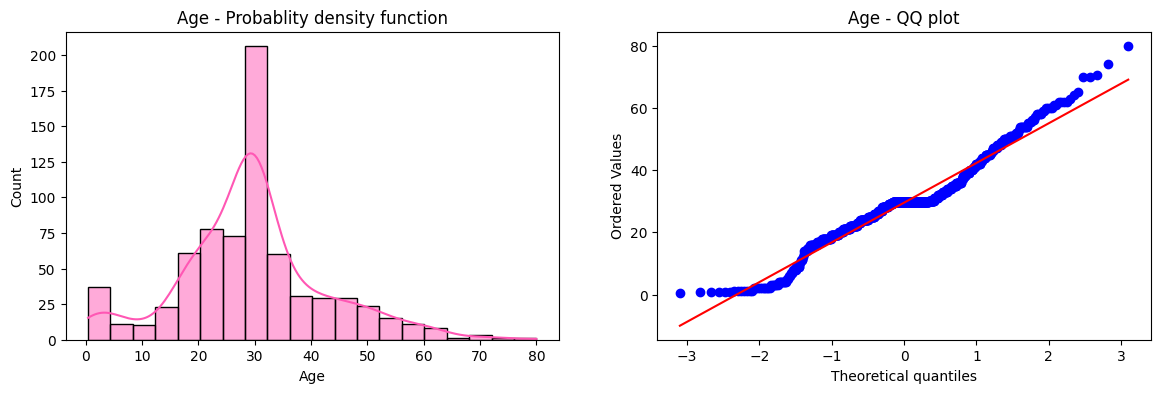

In [38]:
plot.figure(figsize=(14,4))

plot.subplot(121)
sb.histplot(xtrain['Age'], color="#ff57b4", kde=True, bins=20)
plot.title('Age - Probablity density function')

plot.subplot(122)
stats.probplot(xtrain['Age'], dist='norm', plot=plt)
plot.title('Age - QQ plot')

plot.show()

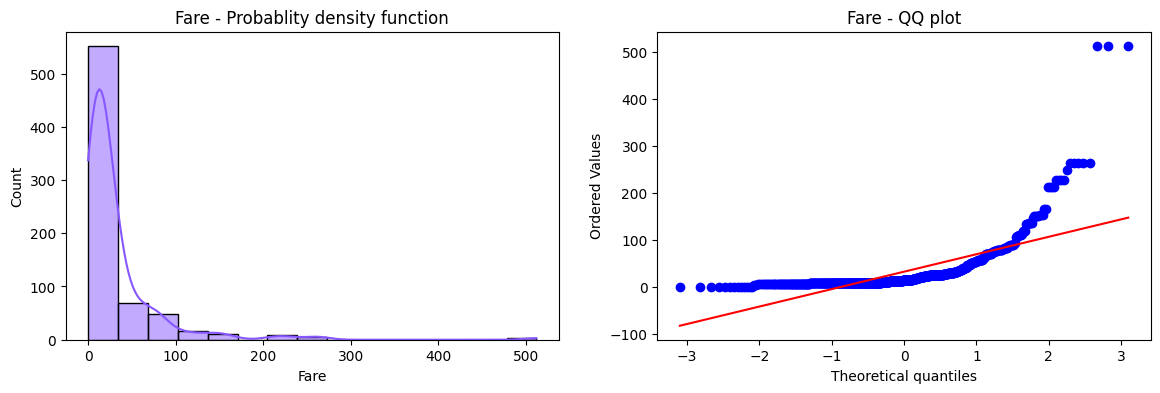

In [42]:
plot.figure(figsize=(14,4))

plot.subplot(121)
sb.histplot(xtrain['Fare'], color="#8757ff", kde=True, bins=15)
plot.title('Fare - Probablity density function')

plot.subplot(122)
stats.probplot(xtrain['Fare'], dist='norm', plot=plt)
plot.title('Fare - QQ plot')

plot.show()

### **Normal Train & Test**

In [43]:
c1 = LogisticRegression()
c2 = DecisionTreeClassifier()

In [46]:
c1.fit(xtrain, ytrain)
c2.fit(xtrain, ytrain)

ypred_c1 = c1.predict(xtest)
ypred_c2 = c2.predict(xtest)

print(f"Accuracy with c1 = {accuracy_score(ytest, ypred_c1)*100}%")
print(f"Accuracy with c2 = {accuracy_score(ytest, ypred_c2)*100}%")

Accuracy with c1 = 64.80446927374301%
Accuracy with c2 = 67.59776536312849%


### **Using function transformer**

In [47]:
ft = FunctionTransformer(func=np.log1p)

In [48]:
xtrain_transformed = ft.fit_transform(xtrain)
xtest_transformed = ft.transform(xtest)

In [49]:
c1.fit(xtrain_transformed, ytrain)
c2.fit(xtrain_transformed, ytrain)

ypred_c1 = c1.predict(xtest_transformed)
ypred_c2 = c2.predict(xtest_transformed)

print(f"Accuracy with c1 = {accuracy_score(ytest, ypred_c1)*100}%")
print(f"Accuracy with c2 = {accuracy_score(ytest, ypred_c2)*100}%")

Accuracy with c1 = 68.15642458100558%
Accuracy with c2 = 67.59776536312849%


### **Results**

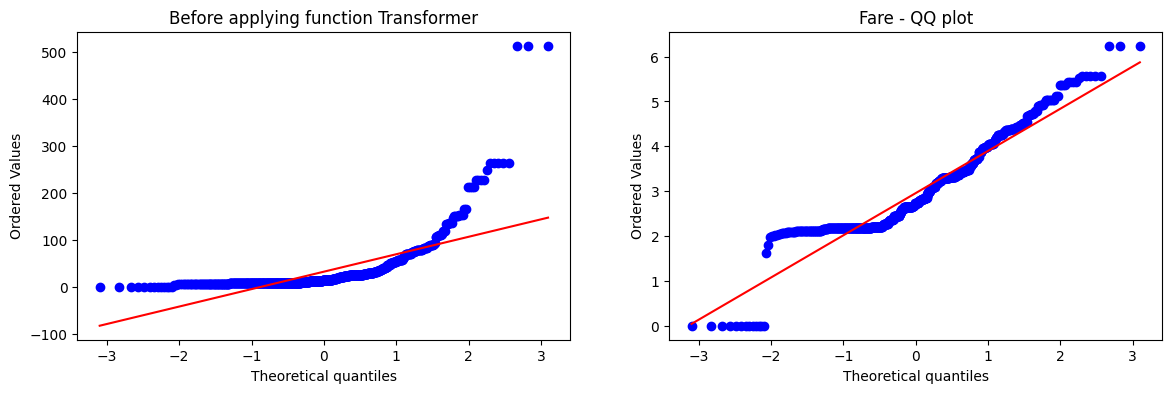

In [ ]:
plot.figure(figsize=(14,4))

plot.subplot(121)
stats.probplot(xtrain['Fare'], dist='norm', plot=plt)
plot.title('Before applying function Transformer')

plot.subplot(122)
stats.probplot(xtrain_transformed['Fare'], dist='norm', plot=plt)
plot.title('After applying function Transformer')

plot.show()

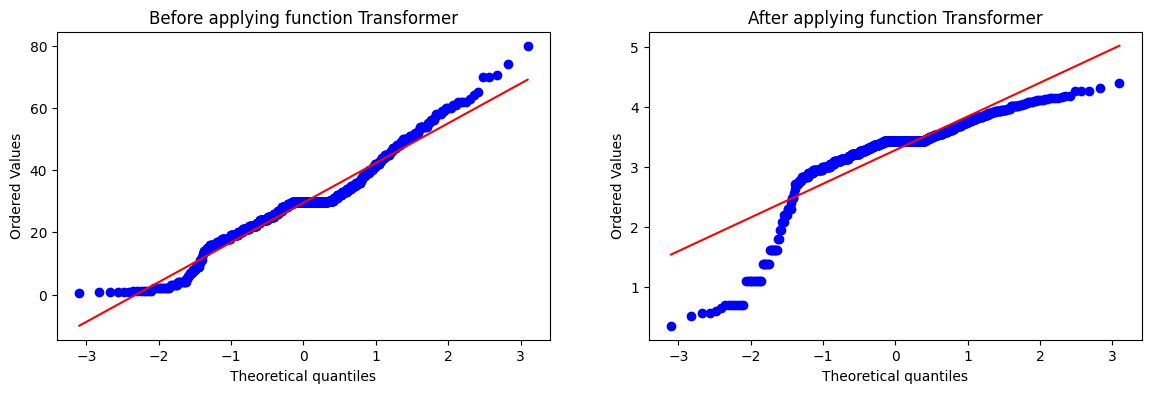

In [52]:
plot.figure(figsize=(14,4))

plot.subplot(121)
stats.probplot(xtrain['Age'], dist='norm', plot=plt)
plot.title('Before applying function Transformer')

plot.subplot(122)
stats.probplot(xtrain_transformed['Age'], dist='norm', plot=plt)
plot.title('After applying function Transformer')

plot.show()

##### **1. On 'Fare' column - it is giving good results**

##### **2. On 'Age' column - it is giving negative results**